# Customer Sales and CLV Analysis 

Author: Ting-Yu Hsu

# Step 1: Understand the dataset (5 points)

In [1]:
import pandas as pd
df = pd.read_csv('customer_sales.csv')

### 1. Are there any missing values in the dataset? (0.5)

In [2]:
missing_values = df.isna().sum()
print(missing_values)
print(f'there are {missing_values.sum()} missing values')

Order ID          0
Order Date        6
Customer Name     1
Country           1
State             4
City              4
Region            0
Segment           1
Ship Mode         5
Category          5
Sub-Category      0
Product Name      0
Discount          7
Sales             2
Profit           13
Quantity         13
dtype: int64
there are 62 missing values


### 2. What is the range of dates in the dataset? (1.5)

In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
latest_date = df['Order Date'].max()
ealiest_date = df['Order Date'].min()
date_range_days = (latest_date - ealiest_date).days
print(f"The range of dates in the dataset is {date_range_days} days from {latest_date.strftime('%Y-%m-%d')} to {ealiest_date.strftime('%Y-%m-%d')}")

The range of dates in the dataset is 1460 days from 2014-12-31 to 2011-01-01


/var/folders/h6/klvb6_m549910x127srrt7040000gn/T/ipykernel_25183/2286883469.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


### 3. How many unique customers are there in the dataset? (0.5)

In [4]:
print(f"There are {len(df['Customer Name'].unique())} unique customers")

There are 793 unique customers


### 4. How many unique orders are there in the dataset? (0.5)

In [5]:
print(f"There are {len(df['Order ID'].unique())} unique orders")

There are 4117 unique orders


### 5. Profile the data to give the standard descriptive statistics for the Sales field. What are the min, max, variance, and standard deviations? (0.5)

In [6]:
df['Sales'] = df['Sales'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/h6/klvb6_m549910x127srrt7040000gn/T/ipykernel_25183/2615467597.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['Sales'] = df['Sales'].replace('[\$,]', '', regex=True).astype(float)


In [7]:
min_sales = df['Sales'].min()
max_sales = df['Sales'].max()
variance_sales = df['Sales'].var()
std_deviation_sales = df['Sales'].std()

print("Minimum Sales:", min_sales)
print("Maximum Sales:", max_sales)
print("Variance of Sales:", variance_sales)
print("Standard Deviation of Sales:", std_deviation_sales)

Minimum Sales: -110.0
Maximum Sales: 206000.0
Variance of Sales: 10355997.724068953
Standard Deviation of Sales: 3218.0736045138797


### 6. Do transaction amounts (sales) in general increase over time (perhaps due to inflation)? (1.5)

Text(0, 0.5, 'Transaction Amount')

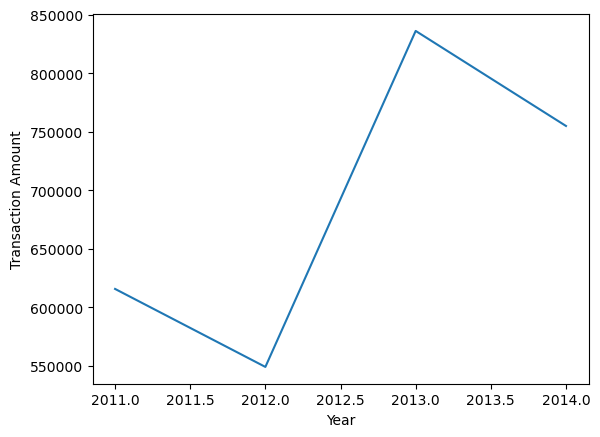

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

df_con = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
df_con
plt.plot(df_con['Order Date'], df_con['Sales'])
plt.xlabel("Year")
plt.ylabel("Transaction Amount")

Seeing from the trend, the sales decreased in 2012 and then rebounded in 2013 and then dropped in 2014. However, the graph is somehow abnormal may be because there are some ouliers, which is extremely huge. To better get insights from visualization, I manually eliminate outliers, which are sales over 100,000.

Text(0, 0.5, 'Transaction Amount')

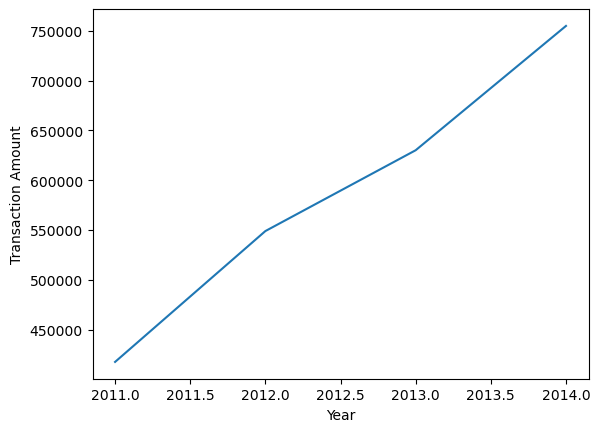

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

df_cleaned = df[df['Sales'] <= 100000]
df_con = df_cleaned.groupby(df_cleaned['Order Date'].dt.year)['Sales'].sum().reset_index()
df_con
plt.plot(df_con['Order Date'], df_con['Sales'])
plt.xlabel("Year")
plt.ylabel("Transaction Amount")

In general, there seems to be an upward trend in transaction amounts. It maybe due to inflation or increased demand.

# Step 2: Explore the dataset (8 points)

### 1. Are there any outliers or values that don’t make sense? You can use statistical tests to check for outliers. Or, you can simply plot the histogram of the Sales and see if there is any value that appears to be abnormal. (Hint, is there any value that appears to be abnormally large or small? Could it be caused by bad entries (e.g. forgetting a decimal separator?). If there are outliers , how would you treat them? (4)

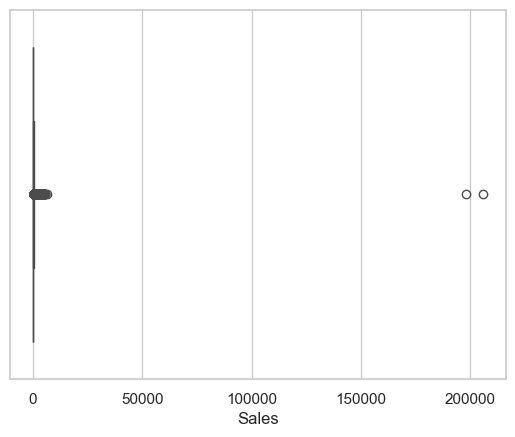

In [10]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot (x=df['Sales'])

In [11]:
df[df['Sales']>100000]

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity
28,BN-2011-4913858,2011-01-13,Julian Dobie,Netherlands,South Holland,Dordrecht,Central,Consumer,Economy,Office Supplies,Storage,"Smead Lockers, Blue",0.5,198000.0,-131.0,2.0
5246,AZ-2013-467128,2013-12-04,John Basser,Germany,Hamburg,Hamburg,Central,Corporate,Economy,Office Supplies,Envelopes,"Kraft Peel and Seal, Security-Tint",0.0,206000.0,33.0,9.0


In [12]:
df['Sales'].describe()

count      8045.000000
mean        342.542946
std        3218.073605
min        -110.000000
25%          48.000000
50%         116.000000
75%         313.000000
max      206000.000000
Name: Sales, dtype: float64

In [13]:
df[df['Sales']<=0]

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity
180,BN-2011-1399750,2011-03-15,Wanda Wingert,United Kingdom,England,London,North,Consumer,Immediate,Office Supplies,Art,"Binney & Smith Pens, Blue",0.1,-110.0,4.0,1.0
381,AZ-2011-309750,2011-05-19,Milla Hollinworth,Spain,Castile-La Mancha,Toledo,South,Corporate,Economy,Office Supplies,Paper,"Xerox Memo Slips, Multicolor",0.0,0.0,0.0,1.0
7327,AZ-2014-6494772,2014-10-16,Kian Sykes,France,Provence-Alpes-Côte d'Azur,Carpentras,Central,Consumer,Priority,Office Supplies,Art,"Stanley Markers, Fluorescent",0.0,-70.0,24.0,3.0
7328,AZ-2014-6494772,2014-10-16,Kian Sykes,France,Provence-Alpes-Côte d'Azur,Carpentras,Central,Consumer,Priority,Office Supplies,Binders,"Cardinal Index Tab, Clear",0.0,-47.0,20.0,7.0


From the boxplot, we can see that there are two outliers have extremely huge amount.

Additionally, there are orders with negative sales, which is not reasonable, so they are outliers as well.

If there are outliers, I will remove them before conducting further analysis. This is because outliers, particularly those with negative and zero amount or extremely high values, are likely to be abnormal and nonsensical, potentially skewing the results.

I eyeball the boxplot and find two huge data points, so i set the upper bound as 100,000 to exclude these two.

In [14]:
# Remove Rows with Missing Values
df_processed = df.dropna()
# Filter Based on Sales Values
df_processed=df_processed[(df_processed['Sales'] <= 100000) & (df_processed['Sales'] >= 0)]

In [15]:
df_processed.describe()

,Order Date,Discount,Sales,Profit,Quantity
count,8008,8008.000000,8008.000000,8008.000000,8008.000000
mean,2013-04-22 03:10:47.352647424,0.112238,292.624126,35.037962,3.769481
min,2011-01-01 00:00:00,0.000000,0.000000,-3060.000000,1.000000
25%,2012-06-13 18:00:00,0.000000,49.000000,1.000000,2.000000
50%,2013-06-13 00:00:00,0.000000,117.000000,14.000000,3.000000
75%,2014-05-02 00:00:00,0.100000,314.000000,47.000000,5.000000
max,2014-12-31 00:00:00,0.900000,6517.000000,2476.000000,14.000000
std,NaN,0.183114,487.111872,177.714033,2.199619


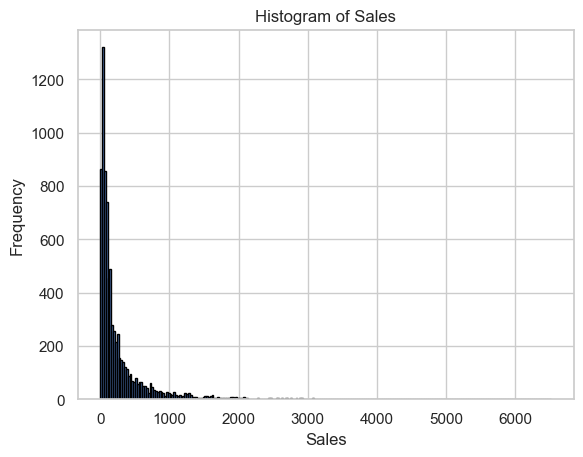

In [16]:
plt.hist(df_processed['Sales'], bins='auto', edgecolor='black')  
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

Now, the distribution seems normal as most data points are within a limited range, and it can be used for analysis.

### 2. Does giving discounts increase sales and/or profits? Make a graph to show that. Comment on what happens at 80% discount level, and what’s the optimum level for maximizing total profit. (2)

In [17]:
df_processed['Discount']=df_processed['Discount']*100

grouped_data = df_processed.groupby('Discount').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index()

In [18]:
grouped_data[grouped_data['Discount']==80]

,Discount,Sales,Profit
8,80.0,46.333333,-142.0


At 80% discount level, the company has severe loss.

In [19]:
grouped_data

,Discount,Sales,Profit
0,0.0,251.918919,63.940008
1,10.0,440.369748,72.829641
2,20.0,564.397468,41.718987
3,30.0,124.256410,-15.692308
4,40.0,393.546099,-97.865248
5,50.0,171.701736,-89.116445
6,60.0,206.760417,-155.718750
7,70.0,455.800000,-537.850000
8,80.0,46.333333,-142.000000
9,90.0,555.000000,-1925.000000


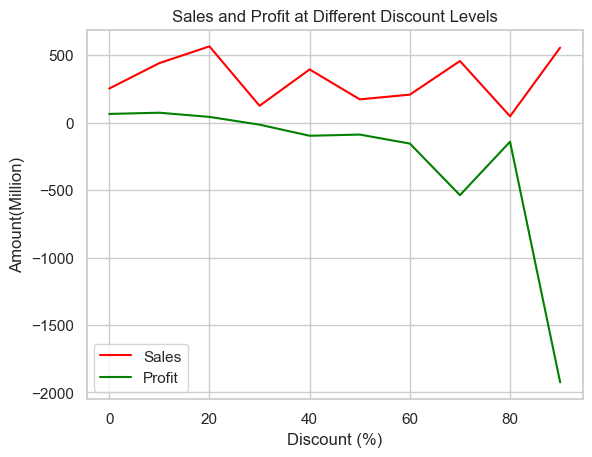

In [20]:
fig= figsize=(10, 6)

plt.plot(grouped_data['Discount'], grouped_data['Sales'], color='red', label='Sales')
plt.plot(grouped_data['Discount'], grouped_data['Profit'], color='green', label='Profit')

plt.legend()
plt.xlabel('Discount (%)')
plt.ylabel('Amount(Million)')
plt.title('Sales and Profit at Different Discount Levels')


plt.show()

The profit seems to be highest at lower discount levels, specifically around 10%. After this point, as the discount increases, the profit decreases and even becomes negative, implying losses. The optimum level for maximizing total profit appears to be around the 10% discount mark. Overall, if the discount is not over 30%, the company can still earn so the discount less than 30% is acceptable.

### 3. What factors affect the sales the most? You can run a simple regression to understand the impact. (2)

The Order ID and customer name are distinct for the dataset, so they are primary keys. Therefore these two are not included in regression formula.

In [36]:
import statsmodels.api as sm
import numpy as np
from patsy import dmatrices

# Convert Order Date to datetime and extract year and month
df_processed['Order Date'] = pd.to_datetime(df_processed['Order Date'])
df_processed['Year'] = df_processed['Order Date'].dt.year
df_processed['Month'] = df_processed['Order Date'].dt.month


numeric_cols = ['Discount', 'Quantity', 'Year', 'Month']
categorical_cols = ['Country', 'State', 'City', 'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category', 'Product Name']

# Create dummy variables for categorical data
df_dummies = pd.get_dummies(df_processed[categorical_cols])

X = pd.concat([df_processed[numeric_cols], df_dummies], axis=1)
y = df_processed['Sales']
X = sm.add_constant(X)
X = X.astype({col: 'int' for col in X.select_dtypes(include=['bool']).columns})

# Fit the model
model = sm.OLS(y, X).fit()

coefficients = model.params
top_5_largest = coefficients.sort_values(ascending=False).head(5)
top_5_smallest = coefficients.sort_values(ascending=True).head(5)

print("Top 5 variables with the largest coefficients:")
print(top_5_largest)
print("\nTop 5 variables with the smallest coefficients:")
print(top_5_smallest)

Top 5 variables with the largest coefficients:
Product Name_Motorola Smart Phone, Cordless             2720.310743
Product Name_Nokia Smart Phone, Cordless                2085.832321
Product Name_Samsung Smart Phone, VoIP                  2042.312684
Product Name_KitchenAid Refrigerator, Black             2040.582549
Product Name_SAFCO Executive Leather Armchair, Black    1989.369172
dtype: float64

Top 5 variables with the smallest coefficients:
City_Treviglio                           -2125.119489
City_Hardenberg                          -1185.942627
Product Name_HP Personal Copier, Color   -1114.646357
City_Villeneuve-Saint-Georges             -965.336754
City_Saint-Dizier                         -959.655485
dtype: float64


Most variables with the larger or smaller coefficients are about Product Name.
Factor affect the sales the most is "Product Name".
This is reasonable that product name equals to product itself and directly effect the sales, which is price multiple by the quantity.

In [33]:
numeric_cols = ['Discount', 'Quantity', 'Year', 'Month']
categorical_cols = ['Country', 'State', 'City', 'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category']

# Create dummy variables for categorical data
df_dummies = pd.get_dummies(df_processed[categorical_cols])

X = pd.concat([df_processed[numeric_cols], df_dummies], axis=1)  # Excluding 'Sales' from predictors
y = df_processed['Sales']
X = sm.add_constant(X)
X = X.astype({col: 'int' for col in X.select_dtypes(include=['bool']).columns})

# Fitting the regression model
model = sm.OLS(y, X).fit()

coefficients = model.params
top_5_largest = coefficients.sort_values(ascending=False).head(5)
top_5_smallest = coefficients.sort_values(ascending=True).head(5)

print("Top 5 variables with the largest coefficients:")
print(top_5_largest)
print("\nTop 5 variables with the smallest coefficients:")
print(top_5_smallest)

Top 5 variables with the largest coefficients:
City_Poitiers           2102.233980
City_Plaisir            1910.166154
City_Crawley            1404.069962
City_Annecy-le-Vieux    1288.036407
City_Saint-Louis        1259.746272
dtype: float64

Top 5 variables with the smallest coefficients:
const                      -1160.673096
Category_Office Supplies    -680.348759
City_Mauguio                -617.428563
City_Cuxhaven               -603.611339
City_Bron                   -581.422263
dtype: float64


In addition to the product name, I am keen to investigate other variables. Consequently, I have excluded the product name from the linear regression formula. Most variables with the larger or smaller coefficients are about the city. Therefore, the factor that most significantly affects sales appears to be the city aside from the product name.

# Step 3: Determine origin year of customers (1)

In [37]:
dfEarlyOrder = df_processed.groupby('Customer Name')['Year'].min()
dfEarlyOrder = dfEarlyOrder.reset_index()
dfEarlyOrder.rename(columns = {'Year': 'OriginYear'}, inplace = True)
dfEarlyOrder

,Customer Name,OriginYear
0,Aaron Bootman,2011
1,Aaron Cunningham,2011
2,Aaron Davey,2011
3,Aaron Macrossan,2011
4,Abbie Perry,2011
...,...,...
787,Zara Loton,2013
788,Zara Money,2011
789,Zoe Lanigan,2011
790,Zoe Lowin,2011


In [38]:
df_final = pd.merge(df_processed, dfEarlyOrder, on = 'Customer Name', how = 'left')
df_final.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Year,Month,OriginYear
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",50.0,45.0,-26.0,3.0,2011,1,2011
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854.0,290.0,7.0,2011,1,2011
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140.0,21.0,3.0,2011,1,2011
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",50.0,27.0,-22.0,2.0,2011,1,2011
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",50.0,17.0,-1.0,2.0,2011,1,2011


# Step 4: Calculate cumulative transaction amounts (2)

In [39]:
df_final['Age'] = (df_final['Order Date'] - pd.to_datetime(df_final['OriginYear'], format='%Y')).dt.days / 31
df_final.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Year,Month,OriginYear,Age
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",50.0,45.0,-26.0,3.0,2011,1,2011,0.000000
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.0,854.0,290.0,7.0,2011,1,2011,0.064516
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.0,140.0,21.0,3.0,2011,1,2011,0.096774
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",50.0,27.0,-22.0,2.0,2011,1,2011,0.096774
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",50.0,17.0,-1.0,2.0,2011,1,2011,0.096774


In [40]:
def ageRangeFunc(d):
    if (d['Age'] <= 12):
        return 12
    elif (d['Age'] > 12 and d['Age']<= 24):
        return 24
    elif (d['Age'] > 24 and d['Age']<= 36):
        return 36
    elif (d['Age'] > 36 and d['Age']<= 48):
        return 48
    elif (d['Age'] > 48 and d['Age']<= 60):
        return 60
    else:
        return 72

In [41]:
df_final['AgeRange'] = df_final.apply(ageRangeFunc, axis = 1)
trans_amount = df_final.pivot_table(values='Sales', index='OriginYear', columns='AgeRange', aggfunc = 'sum')
trans_amount = trans_amount.cumsum(axis = 1) # axis = 1 to cumsum over columns
trans_amount

AgeRange,12,24,36,48
OriginYear,,,,
2011,411478.0,757733.0,1142314.0,1591509.0
2012,218287.0,390858.0,583962.0,NaN
2013,85388.0,152527.0,NaN,NaN
2014,15336.0,NaN,NaN,NaN


# Step 5: Calculate the number of new customers (1)

In [42]:
df_new_customer = df_final[df_final['OriginYear'] == df_final['Year']]
df_new_customer.duplicated(subset = ['Customer Name']).value_counts()

True     1667
False     792
Name: count, dtype: int64

In [43]:
new_cust = df_final.groupby('OriginYear')['Customer Name'].nunique()
new_cust

OriginYear
2011    487
2012    207
2013     80
2014     18
Name: Customer Name, dtype: int64

There are 792 new customers

# Step 6: Historic CLV (2)

In [44]:
unpivot_trans = trans_amount.reset_index().melt(id_vars=["OriginYear"], var_name="Age", value_name="Sales")
unpivot_trans

,OriginYear,Age,Sales
0,2011,12,411478.0
1,2012,12,218287.0
2,2013,12,85388.0
3,2014,12,15336.0
4,2011,24,757733.0
5,2012,24,390858.0
6,2013,24,152527.0
7,2014,24,NaN
8,2011,36,1142314.0
9,2012,36,583962.0


In [45]:
df_final_trans = unpivot_trans.merge(new_cust, on = 'OriginYear', how = 'left')
df_final_trans.rename(columns = {'Customer Name': 'NewCust'}, inplace = True)
df_final_trans['CLV'] = df_final_trans['Sales'] / df_final_trans['NewCust']
df_final_trans

,OriginYear,Age,Sales,NewCust,CLV
0,2011,12,411478.0,487,844.924025
1,2012,12,218287.0,207,1054.526570
2,2013,12,85388.0,80,1067.350000
3,2014,12,15336.0,18,852.000000
4,2011,24,757733.0,487,1555.919918
5,2012,24,390858.0,207,1888.202899
6,2013,24,152527.0,80,1906.587500
7,2014,24,NaN,18,NaN
8,2011,36,1142314.0,487,2345.613963
9,2012,36,583962.0,207,2821.072464


In [46]:
CLV_table = df_final_trans.pivot_table(values='CLV', index='OriginYear', columns='Age', aggfunc = 'sum')
df_final_trans.pivot(columns='Age',values='CLV')
CLV_table

Age,12,24,36,48
OriginYear,,,,
2011,844.924025,1555.919918,2345.613963,3267.985626
2012,1054.526570,1888.202899,2821.072464,0.000000
2013,1067.350000,1906.587500,0.000000,0.000000
2014,852.000000,0.000000,0.000000,0.000000


<Axes: xlabel='Age', ylabel='CLV'>

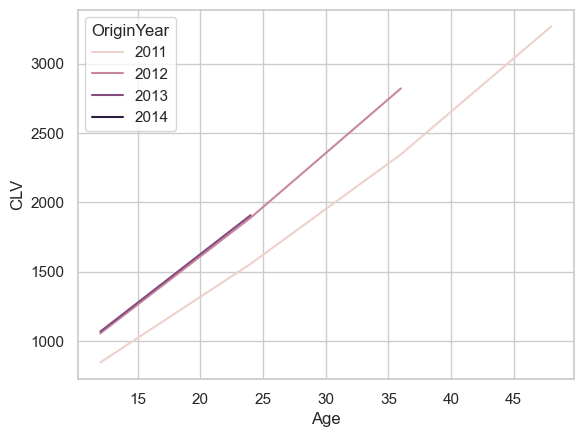

In [47]:
sns.lineplot(x = df_final_trans['Age'], y = df_final_trans['CLV'], hue = df_final_trans['OriginYear'])

# Step 7: Interpreting your results (1)

### 1. How much have customers acquired in 2011 spent to date?

Customers acquired in 2011 have spent ~ $3,268 to date

### 2. Does each group of customers exhibit similar or different patterns of spending? What’s the implication for the business?

- What we see is that retaining an old customer is more beneficial than acquiring a new one since it gives a higher CLV. Hence, the business should focus on retaining the older ones
- The CLV tends to increase with age, suggesting that customers who have been associated with the business for a longer duration contribute more value.
- Customers with a tenure of 1 to 12 months spent more in 2012 and 2013 compared to 2011 and 2014.
- Seeing the graph, we can notice that in general, customers who joined in 2011 generally spent less than those acquired in subsequent years. Apart from 2011, each group of customers exhibits very similar spending patterns.